In [1]:
from scipy.io import loadmat
from ciber_info import *

data = {}
data[1] = loadmat(mypaths['alldat'] + 'TM' + str(1) + '/stackmapdatarr.mat')['data']
data[2] = loadmat(mypaths['alldat'] + 'TM' + str(2) + '/stackmapdatarr.mat')['data']

for i in range(data[2].shape[0]):
    for j in range(data[2].shape[1]):
        data[2][i][j] = np.rot90(data[2][i][j], k=3)
        
DCdir= mypaths['ciberdir'] + 'doc/20160808_DarkProcess/40030/'
DCmap = {}
DCmap[1] = loadmat( DCdir + 'band'+ str(1) + '_DCtemplate')['DCtemplate']
DCmap[2] = np.rot90(loadmat( DCdir + 'band'+ str(2) + '_DCtemplate')['DCtemplate'], k=3)

apf2eps = cal_factor_dict['apf2eps']

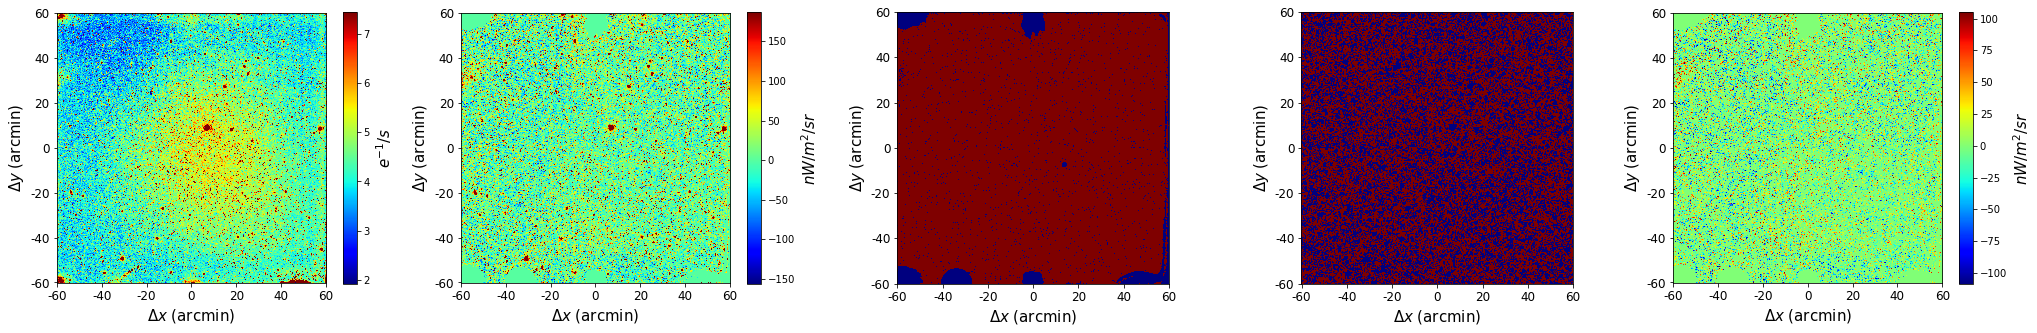

In [9]:
from utils_plotting import *

pixticks = np.linspace(0,1023,7)
pixtick_labels = ['-60', '-40', '-20', '0', '20', '40', '60']


for ifield in [4,5,6,7,8]:
    for inst in [1,2]:
        plt.close()
        fig, ax = plt.subplots(1, 5, figsize = (35,5))
        axi = ax[0]
        p = imageclip(data[inst][ifield-4][0]*apf2eps[inst], ax=axi, return_objects=True)
        p['cbar'].ax.set_ylabel('$e^{-1}/s$', rotation=90, fontsize=15)
        axi.set_xticks(pixticks)
        axi.set_xticklabels(pixtick_labels, fontsize=12)
        axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
        axi.set_yticks(pixticks)
        axi.set_yticklabels(pixtick_labels, fontsize=12)
        axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

        axi = ax[1]
        mask = data[inst][ifield-4][8]
        p = imageclip(data[inst][ifield-4][6]*mask, ax=axi, return_objects=True)
        p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
        axi.set_xticks(pixticks)
        axi.set_xticklabels(pixtick_labels, fontsize=12)
        axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
        axi.set_yticks(pixticks)
        axi.set_yticklabels(pixtick_labels, fontsize=12)
        axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

        axi = ax[2]
        p = imageclip(data[inst][ifield-4][8], ax=axi, return_objects=True, cbar=False)
        axi.set_xticks(pixticks)
        axi.set_xticklabels(pixtick_labels, fontsize=12)
        axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
        axi.set_yticks(pixticks)
        axi.set_yticklabels(pixtick_labels, fontsize=12)
        axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

        axi = ax[3]
        p = imageclip(data[inst][ifield-4][9], ax=axi, return_objects=True, cbar=False)
        axi.set_xticks(pixticks)
        axi.set_xticklabels(pixtick_labels, fontsize=12)
        axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
        axi.set_yticks(pixticks)
        axi.set_yticklabels(pixtick_labels, fontsize=12)
        axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

        axi = ax[4]
        mask = data[inst][ifield-4][8] * data[inst][ifield-4][9]
        p = imageclip(data[inst][ifield-4][6]*mask, ax=axi, return_objects=True)
        p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
        axi.set_xticks(pixticks)
        axi.set_xticklabels(pixtick_labels, fontsize=12)
        axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
        axi.set_yticks(pixticks)
        axi.set_yticklabels(pixtick_labels, fontsize=12)
        axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

        plt.savefig('plots/paperfig/maps_TM%d_%s.png'%(inst, fieldnamedict[ifield]),
                    dpi = 200, bbox_inches='tight')

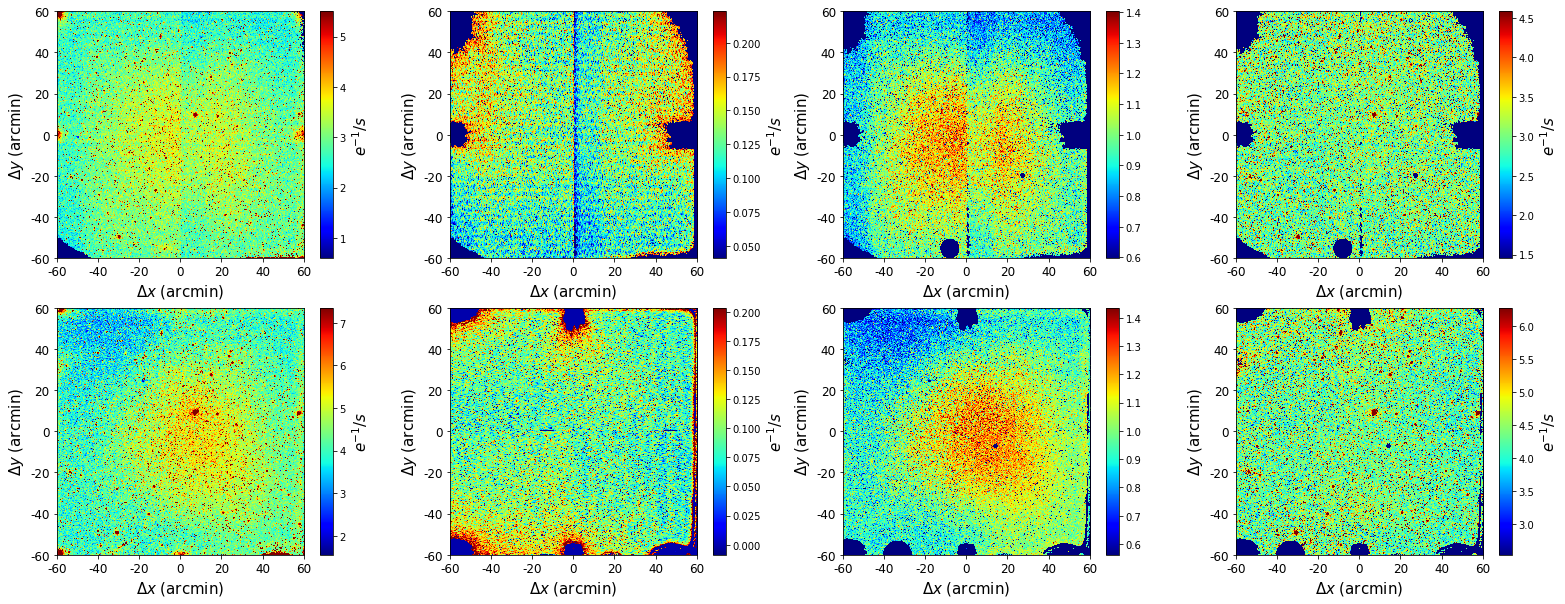

In [2]:
from utils_plotting import *

pixticks = np.linspace(0,1023,7)
pixtick_labels = ['-60', '-40', '-20', '0', '20', '40', '60']

fig, ax = plt.subplots(2, 4, figsize = (27,10))

ifield = 8
for inst in [1,2]:
    axi = ax[inst-1][0]
    p = imageclip(data[inst][ifield-4][0]*apf2eps[inst], ax=axi, return_objects=True)
    p['cbar'].ax.set_ylabel('$e^{-1}/s$', rotation=90, fontsize=15)
    axi.set_xticks(pixticks)
    axi.set_xticklabels(pixtick_labels, fontsize=12)
    axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
    axi.set_yticks(pixticks)
    axi.set_yticklabels(pixtick_labels, fontsize=12)
    axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

    axi = ax[inst-1][1]
    p = imageclip(DCmap[inst]*apf2eps[inst], ax=axi, return_objects=True)
    p['cbar'].ax.set_ylabel('$e^{-1}/s$', rotation=90, fontsize=15)
    axi.set_xticks(pixticks)
    axi.set_xticklabels(pixtick_labels, fontsize=12)
    axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
    axi.set_yticks(pixticks)
    axi.set_yticklabels(pixtick_labels, fontsize=12)
    axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

    axi = ax[inst-1][2]
    p = imageclip(data[inst][ifield-4][4]*data[inst][ifield-4][8], ax=axi, return_objects=True)
    axi.set_xticks(pixticks)
    axi.set_xticklabels(pixtick_labels, fontsize=12)
    axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
    axi.set_yticks(pixticks)
    axi.set_yticklabels(pixtick_labels, fontsize=12)
    axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

    axi = ax[inst-1][3]
    p = imageclip(data[inst][ifield-4][5]*data[inst][ifield-4][8]*apf2eps[inst], 
                  ax=axi, return_objects=True)
    p['cbar'].ax.set_ylabel('$e^{-1}/s$', rotation=90, fontsize=15)
    axi.set_xticks(pixticks)
    axi.set_xticklabels(pixtick_labels, fontsize=12)
    axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
    axi.set_yticks(pixticks)
    axi.set_yticklabels(pixtick_labels, fontsize=12)
    axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)
    
plt.savefig('plots/paperfig/rawmap.png', dpi = 200, bbox_inches='tight')

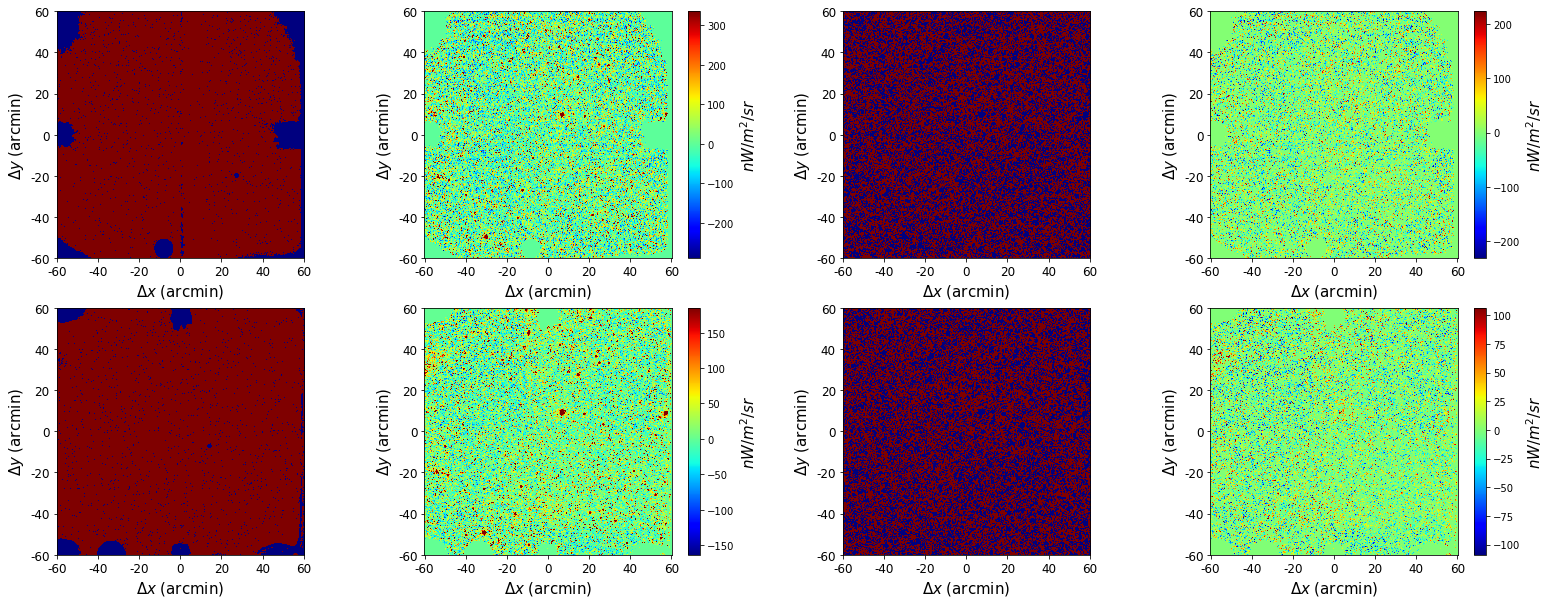

In [3]:
from utils_plotting import *

pixticks = np.linspace(0,1023,7)
pixtick_labels = ['-60', '-40', '-20', '0', '20', '40', '60']

fig, ax = plt.subplots(2, 4, figsize = (27,10))

ifield = 8
for inst in [1,2]:
    axi = ax[inst-1][0]
    p = imageclip(data[inst][ifield-4][8], ax=axi, return_objects=True, cbar=False)
    axi.set_xticks(pixticks)
    axi.set_xticklabels(pixtick_labels, fontsize=12)
    axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
    axi.set_yticks(pixticks)
    axi.set_yticklabels(pixtick_labels, fontsize=12)
    axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

    axi = ax[inst-1][1]
    mask = data[inst][ifield-4][8]
    p = imageclip(data[inst][ifield-4][6]*mask, ax=axi, return_objects=True)
    p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
    axi.set_xticks(pixticks)
    axi.set_xticklabels(pixtick_labels, fontsize=12)
    axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
    axi.set_yticks(pixticks)
    axi.set_yticklabels(pixtick_labels, fontsize=12)
    axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

    axi = ax[inst-1][2]
    p = imageclip(data[inst][ifield-4][9], ax=axi, return_objects=True, cbar=False)
    axi.set_xticks(pixticks)
    axi.set_xticklabels(pixtick_labels, fontsize=12)
    axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
    axi.set_yticks(pixticks)
    axi.set_yticklabels(pixtick_labels, fontsize=12)
    axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)
    
    axi = ax[inst-1][3]
    mask = data[inst][ifield-4][8] * data[inst][ifield-4][9]
    p = imageclip(data[inst][ifield-4][6]*mask, ax=axi, return_objects=True)
    p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
    axi.set_xticks(pixticks)
    axi.set_xticklabels(pixtick_labels, fontsize=12)
    axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
    axi.set_yticks(pixticks)
    axi.set_yticklabels(pixtick_labels, fontsize=12)
    axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

plt.savefig('plots/paperfig/mask.png', dpi = 200, bbox_inches='tight')

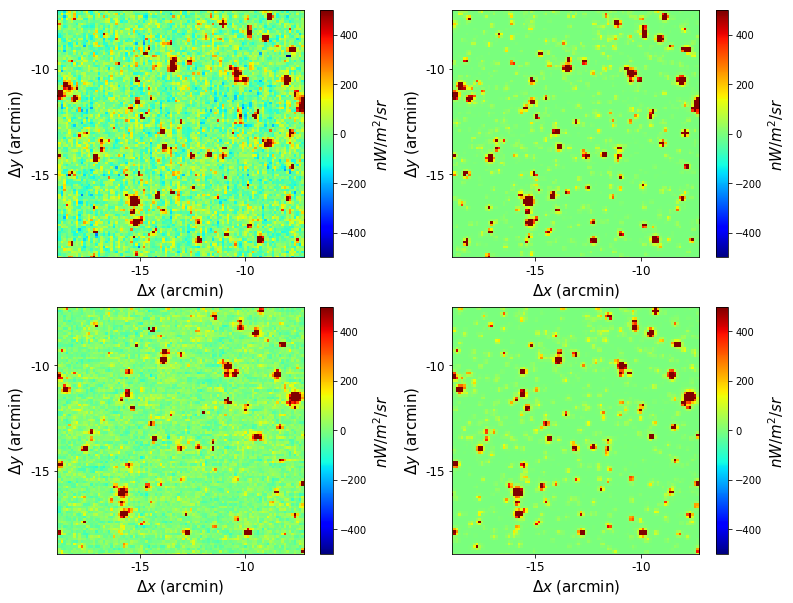

In [4]:
from utils_plotting import *

fig, ax = plt.subplots(2, 2, figsize = (13,10))

pixticks1 = np.linspace(0,511.5,13)
pixtick_labels1 = ['-60', '-55', '-50', '-45', '-40', '-35', 
                  '-30', '-25', '-20', '-15', '-10', '-5', '0']

ifield = 8
for inst in [1,2]:
    mask = data[inst][ifield-4][8]
    cbmap = data[inst][ifield-4][6]
    psmap = data[inst][ifield-4][7]
    
    axi = ax[inst-1][0]
    p = imageclip(cbmap*mask, vmin=-500, vmax=500, ax=axi, return_objects=True)
    p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
    axi.set_xticks(pixticks1)
    axi.set_xticklabels(pixtick_labels1, fontsize=12)
    axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
    axi.set_yticks(pixticks1)
    axi.set_yticklabels(pixtick_labels1, fontsize=12)
    axi.set_xlim([350,450])
    axi.set_ylim([350,450])
    axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)

    axi = ax[inst-1][1]
    p = imageclip(psmap*mask, vmin=-500, vmax=500, ax=axi, return_objects=True)
    p['cbar'].ax.set_ylabel('$nW/m^2/sr$', rotation=90, fontsize=15)
    axi.set_xticks(pixticks1)
    axi.set_xticklabels(pixtick_labels1, fontsize=12)
    axi.set_xlabel(r"$\Delta x$ (arcmin)", fontsize=15)
    axi.set_yticks(pixticks1)
    axi.set_yticklabels(pixtick_labels1, fontsize=12)
    axi.set_ylabel(r"$\Delta y$ (arcmin)", fontsize=15)
    axi.set_xlim([350,450])
    axi.set_ylim([350,450])
plt.savefig('plots/paperfig/srcmap.png', dpi = 200, bbox_inches='tight')